date created: 3/20/2020 <br>
author: gargeya vunnava <br>
github username: gargeyavunnava

##### Importing relevant Python libraries
1. matplotlib to save plots
2. pandas to work with pandas series and dataframes
3. numpy to work with arrays
4. datetime to work with date time styled index

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime

Loading the Wabash river discharge data into a pandas dataframe 'data'. <br>
The first 26 rows have been skipped while loading to directly jump to the required data

In [2]:
data =  pd.read_table('WabashRiver_DailyDischarge_20150317-20160324.txt', skiprows=26, header=None, sep="\t")

The variable 'time_stamps' is used to store all the date, time and minutes data for all the discharge values with a frequency of 15 mins as in the raw data file

In [3]:
time_stamps = pd.date_range('2015-03-17', periods=data.shape[0], freq='15T') # using '15T' for 15 min time interval

#### Editing the raw dataframe
1. The index of the dataframe is updated with the created datetime index. 
2. Dropping unecessary columns from the raw data with 'drop()' function.
3. Assigning the column name 'Discharge in cubic ft/sec' for the column containing the discharge values.

In [4]:
data.index = time_stamps
data = data.drop([0,1,2,3,5], axis=1) #dropping columns
data.columns = ['Discharge in cubic ft/sec']

#### Plotting daily mean discharge rates
1. the dataframe 'data' is resampled to a daily frequency with mean daily discharge value.
2. assigning x and y label as 'Date' and 'Discharge' respectively.
3. Saving the plot as a pdf

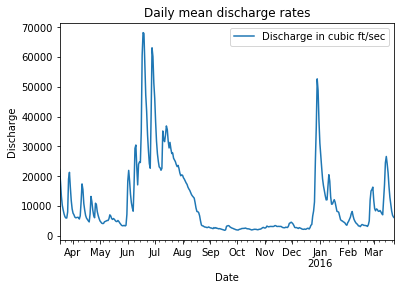

In [5]:
fig1= data.resample('D').mean().plot() #using 'D' to specify daily
fig1.set_ylabel('Discharge') # set y label
fig1.set_xlabel('Date') # set x label
fig1.set_xlim(data.index[0],data.index[-1]) #setting x axis for date range
fig1.set_title('Daily mean discharge rates')
plt.savefig('daily average streamflow.pdf') # saving plots as pdf

#### Plotting top 10 daily mean discharge rates with the same time axis as in the previous plot
1. the resampled data from the previous step is sorted in the descending order and the top ten values are selected using 'head(10)' function with the number '10' passed as function input argument.
2. assigning x and y label as 'Date' and 'Discharge' respectively.
3. Saving the plot as a pdf

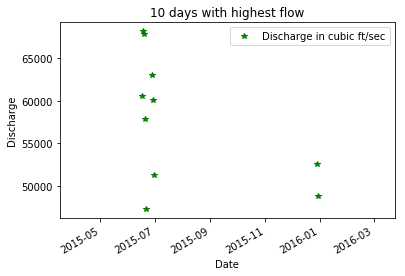

In [6]:
fig = data.resample('D').mean().sort_values(by='Discharge in cubic ft/sec', ascending=False).head(10).plot(style='*g')
fig.set_ylabel('Discharge') # set y label
fig.set_xlabel('Date') # set x label
fig.set_xlim(data.index[0],data.index[-1]) #setting x axis for date range
fig.set_title('10 days with highest flow')
plt.savefig('10 days with highest flow.pdf') # saving plots as pdf

#### Plotting monthly mean discharge rates
1. the dataframe 'data' is resampled to a monthly frequency with mean monthly discharge value.
2. assigning x and y label as 'Date' and 'Discharge' respectively.
3. Saving the plot as a pdf

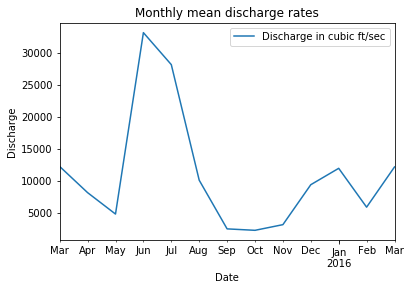

In [7]:
fig2= data.resample('M').mean().plot() #using 'M' to specify monthly
fig2.set_ylabel('Discharge') #setting y label
fig2.set_xlabel('Date') #setting x label
fig2.set_xlim(data.index[0],data.index[-1]) #setting x axis for date range
fig2.set_title('Monthly mean discharge rates')
plt.savefig('Monthly average streamflow.pdf') #saving plots as pdf